In [ ]:
'''Write a program to 
a.	Read the California state local area unemployment file using Pandas dataframe. The file is named as ca_local_area_unemployment_stats.csv file.
b.	Read the California county details file using Pandas dataframe. The file is named as county_details.csv
c.	Join the 2 dataframes to get county name for each row of the CA local unemployment data
d.	From the new joined dataframe drop the unnecessary columns like county_number and county_name
e.	Then filter the rows so that you get data for only seasonal employees (seasonally_adjusted_yn="Y")
f.	To this datafram now add a new column which is unemployment rate. Below is the calculation for unemployment rate
i.	unemployment_percentage_rate=employment_number/unemployment_number 
g.	Finally render a line plot to show trend of unemployment_rate for each year'''



In [1]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#load unemployment csv file into pandas dataframe
unemp_file_path='/Users/nekki/Desktop/working/ca_local_area_unemployment_stats.csv'
unemp_df = pd.read_csv('/Users/nekki/Desktop/working/ca_local_area_unemployment_stats.csv')
unemp_df

,county_number,date,year,month,seasonally_adjusted_yn,status_prelim_final,labor_force,employment_number,unemployment_number
0,53,1/1/76,1976,January,N,Final,3364151,3040058,324093
1,53,1/1/76,1976,January,Y,Final,3381856,3081806,300050
2,53,1/1/77,1977,January,N,Final,3418933,3107049,311884
3,53,1/1/77,1977,January,Y,Final,3425617,3124784,300833
4,53,1/1/78,1978,January,N,Final,3498613,3225947,272666
...,...,...,...,...,...,...,...,...,...
23459,46,12/1/21,2021,December,N,Final,200900,184500,16400
23460,32,12/1/21,2021,December,N,Final,19760,18770,990
23461,52,12/1/21,2021,December,N,Final,405300,388300,17000
23462,22,12/1/21,2021,December,N,Final,106500,102100,4400


In [4]:
#load county related data file into pandas dataframe
county_details_file_path='/Users/nekki/Desktop/working/county_details.csv'
county_df = pd.read_csv(county_details_file_path)
county_df

,county,county_number,county_abbrv
0,Del Norte,1,DN
1,Siskiyou,2,SIS
2,Modoc,3,MOD
3,Humboldt,4,HUM
4,Trinity,5,TRI
5,Shasta,6,SHA
6,Lassen,7,LAS
7,Tehama,8,TEH
8,Plumas,9,PLU
9,Mendocino,10,MEN


In [34]:
#Join unemployment data and county details dataframes to get county name
unemp_joined_df = pd.merge(county_df,unemp_df,left_on ='county_number',right_on='county_number')
unemp_joined_df

,county,county_number,county_abbrv,date,year,month,seasonally_adjusted_yn,status_prelim_final,labor_force,employment_number,unemployment_number
0,Del Norte,1,DN,1/1/90,1990,January,N,Final,9050,7490,1560
1,Del Norte,1,DN,1/1/91,1991,January,N,Final,9780,8450,1330
2,Del Norte,1,DN,1/1/92,1992,January,N,Final,9690,8150,1530
3,Del Norte,1,DN,1/1/93,1993,January,N,Final,9890,8170,1720
4,Del Norte,1,DN,1/1/94,1994,January,N,Final,10110,8770,1340
...,...,...,...,...,...,...,...,...,...,...,...
23459,Imperial,58,IMP,12/1/17,2017,December,N,Final,71000,58600,12500
23460,Imperial,58,IMP,12/1/18,2018,December,N,Final,71700,58200,13500
23461,Imperial,58,IMP,12/1/19,2019,December,N,Final,74600,59100,15600
23462,Imperial,58,IMP,12/1/20,2020,December,N,Final,67200,55200,12100


In [38]:
#Drop county_number and county_abbrv column and keep only county name
unemp_joined_df.drop(['county_number','county_abbrv'],axis=1)


#and retain only rows where seasonally_adjusted_yn="Y"

final_df = unemp_joined_df.loc[(unemp_joined_df['seasonally_adjusted_yn'] == 'Y')]
final_df

,county,county_number,county_abbrv,date,year,month,seasonally_adjusted_yn,status_prelim_final,labor_force,employment_number,unemployment_number
20385,Los Angeles,53,LA,1/1/76,1976,January,Y,Final,3381856,3081806,300050
20387,Los Angeles,53,LA,1/1/77,1977,January,Y,Final,3425617,3124784,300833
20389,Los Angeles,53,LA,1/1/78,1978,January,Y,Final,3510977,3248508,262469
20391,Los Angeles,53,LA,1/1/79,1979,January,Y,Final,3671974,3452218,219756
20393,Los Angeles,53,LA,1/1/80,1980,January,Y,Final,3746345,3540860,205485
...,...,...,...,...,...,...,...,...,...,...,...
21495,Los Angeles,53,LA,12/1/17,2017,December,Y,Final,5112200,4873900,238300
21497,Los Angeles,53,LA,12/1/18,2018,December,Y,Final,5117900,4880600,237400
21499,Los Angeles,53,LA,12/1/19,2019,December,Y,Final,5213300,4984700,228600
21501,Los Angeles,53,LA,12/1/20,2020,December,Y,Final,4918600,4364200,554300


In [39]:
#calculate the unemployment_percentage_rate 
#and add it as a new column to the dataframe
#unemployment_percentage_rate=employment_number/unemployment_number

pd.options.mode.chained_assignment = None
final_df["unemployment_rate"] = final_df["employment_number"].div(final_df["unemployment_number"])
final_df

,county,county_number,county_abbrv,date,year,month,seasonally_adjusted_yn,status_prelim_final,labor_force,employment_number,unemployment_number,unemployment_rate
20385,Los Angeles,53,LA,1/1/76,1976,January,Y,Final,3381856,3081806,300050,10.270975
20387,Los Angeles,53,LA,1/1/77,1977,January,Y,Final,3425617,3124784,300833,10.387105
20389,Los Angeles,53,LA,1/1/78,1978,January,Y,Final,3510977,3248508,262469,12.376730
20391,Los Angeles,53,LA,1/1/79,1979,January,Y,Final,3671974,3452218,219756,15.709323
20393,Los Angeles,53,LA,1/1/80,1980,January,Y,Final,3746345,3540860,205485,17.231720
...,...,...,...,...,...,...,...,...,...,...,...,...
21495,Los Angeles,53,LA,12/1/17,2017,December,Y,Final,5112200,4873900,238300,20.452791
21497,Los Angeles,53,LA,12/1/18,2018,December,Y,Final,5117900,4880600,237400,20.558551
21499,Los Angeles,53,LA,12/1/19,2019,December,Y,Final,5213300,4984700,228600,21.805337
21501,Los Angeles,53,LA,12/1/20,2020,December,Y,Final,4918600,4364200,554300,7.873354


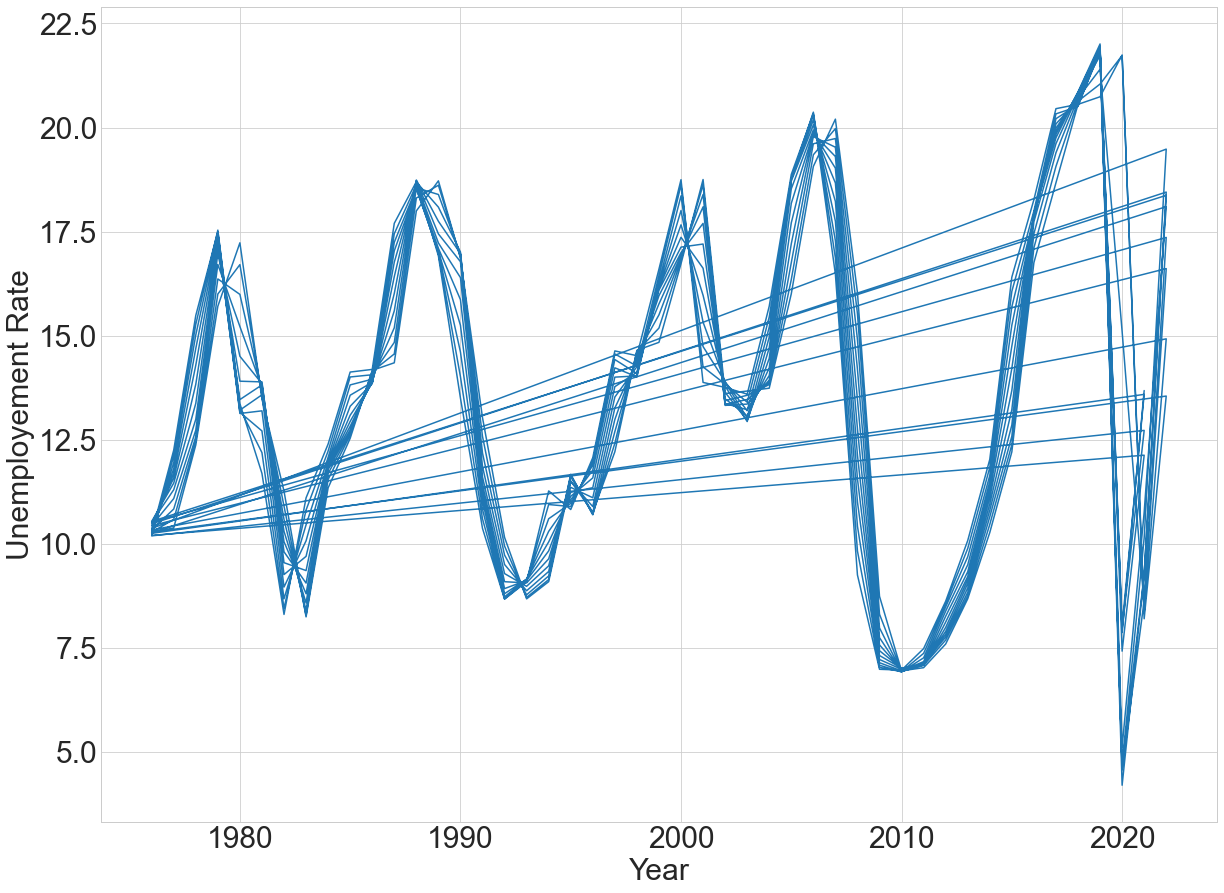

In [51]:
#plot a lineplot on a graph 
#showing the trend of unemployment rate each year from oldest to latest
fig = plt.figure(figsize=(20,15))
plt.style.use('seaborn-whitegrid')

plt.plot(final_df["year"],final_df["unemployment_rate"])
plt.xlabel("Year",fontsize=30)
plt.ylabel("Unemployement Rate",fontsize=30)
plt.rcParams['font.size'] = 30

plt.show()